# **Data Mining Project 2**
202101139 - Ayush Hirdani

## **Data Set : New York Hospital Inpatient Discharge**

### 1. Loading Dataset

Here, I have created `'/data'` directory for my kaggle api token. Then I downloaded the dataset using its kaggle api command.

In [ ]:
!mkdir data

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/data"

In [ ]:
!chmod 600 /content/data/kaggle.json

In [ ]:
!kaggle datasets download -d thedevastator/2010-new-york-state-hospital-inpatient-discharge

 98% 106M/109M [00:01<00:00, 101MB/s] 
100% 109M/109M [00:01<00:00, 106MB/s]


In [ ]:
!unzip "/content/2010-new-york-state-hospital-inpatient-discharge.zip" && rm "/content/2010-new-york-state-hospital-inpatient-discharge.zip"

Archive:  /content/2010-new-york-state-hospital-inpatient-discharge.zip
  inflating: hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv  


### 2. Exploratory Data Analysis (EDA)

This EDA includes checking and removing rows or parts of dataset with null values, a basic understanding of the data and more.

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading Dataset
df = pd.read_csv('/content/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')
df.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33


In [ ]:
# Basic overview for shape
df.shape

(2622133, 38)

In [ ]:
# Columns of the dataset, the features for our model
df.columns

Index(['index', 'Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Source of Payment 2', 'Source of Payment 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

**MetaData for the Dataset**
1. **Health Service Area**: The region or area where the hospital is located.
2. **Hospital County**: The county in which the hospital is situated.
3. **Operating Certificate Number**: A unique number assigned to the hospital for operating certification.
4. **Facility ID**: A unique identifier for the hospital facility.
5. **Facility Name**: The name of the hospital facility.
6. **Age Group**: The age group of the patient.
7. **Zip Code - 3 digits**: The first three digits of the patient's zip code.
8. **Gender**: The gender of the patient.
9. **Race**: The race of the patient.
10. **Ethnicity**: The ethnicity of the patient.
11. **Length of Stay**: The duration of the patient's hospital stay in days.
12. **Type of Admission**: The reason for the patient's hospital admission.
13. **Patient Disposition**: The disposition or status of the patient at discharge (e.g., discharged to home, transferred to another facility).
14. **Discharge Year**: The year in which the patient was discharged.
15. **CCS Diagnosis Code**: The Clinical Classification Software (CCS) code for the patient's diagnosis.
16. **CCS Diagnosis Description**: The description of the patient's diagnosis as per the CCS code.
17. **CCS Procedure Code**: The Clinical Classification Software (CCS) code for the procedure performed.
18. **CCS Procedure Description**: The description of the procedure performed as per the CCS code.
19. **APR DRG Code**: The All Patient Refined Diagnosis Related Group (APR DRG) code for patient classification.
20. **APR DRG Description**: The description of the patient's classification as per the APR DRG code.
21. **APR MDC Code**: The All Patient Refined Major Diagnostic Category (APR MDC) code.
22. **APR MDC Description**: The description of the major diagnostic category as per the APR MDC code.
23. **APR Severity of Illness Code**: The code indicating the severity of the patient's illness.
24. **APR Severity of Illness Description**: The description of the severity of the patient's illness as per the code.
25. **APR Risk of Mortality**: The risk of mortality for the patient.
26. **APR Medical Surgical Description**: The description indicating whether the patient's care was medical or surgical.
27. **Source of Payment 1**: The primary source of payment for the hospital stay.
28. **Source of Payment 2**: The secondary source of payment for the hospital stay.
29. **Source of Payment 3**: The tertiary source of payment for the hospital stay.
30. **Attending Provider License Number**: The license number of the attending provider.
31. **Operating Provider License Number**: The license number of the operating provider.
32. **Other Provider License Number**: The license number of any other provider involved in the care.
33. **Birth Weight**: The birth weight of the patient (if applicable).
34. **Abortion Edit Indicator**: An indicator for whether an abortion was performed.
35. **Emergency Department Indicator**: An indicator for whether the patient was admitted through the emergency department.
36. **Total Charges**: The total charges billed for the hospital stay.
37. **Total Costs**: The total costs incurred by the hospital for the patient's stay.



#### Handling Null Values

In [ ]:
df.isnull().sum()

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3201
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [ ]:
df.dropna(subset=df.columns[df.count() >= 2000000], inplace=True)

In [ ]:
df.isnull().sum()

index                                        0
Health Service Area                          0
Hospital County                              0
Operating Certificate Number                 0
Facility ID                                  0
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                          0
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

*Note*: I have neglected the columns with large number of null values as I am not going to use them in my model training.

#### Data Analysis for Value Counts
This part is for getting the basic overview on the quantities of unique attributes of the data.

**Health Service Area**

In [ ]:
df['Health Service Area'].value_counts()

New York City     1231269
Long Island        385115
Hudson Valley      272922
Western NY         184554
Capital/Adiron     177090
Central NY         170735
Finger Lakes       158467
Southern Tier       31281
Name: Health Service Area, dtype: int64

**CCS Diagnosis Code**

In [ ]:
df['CCS Diagnosis Code'].value_counts()

218.0    240637
657.0     63033
108.0     62099
2.0       60899
102.0     59990
          ...  
53.0         42
86.0         42
223.0        31
206.0        21
174.0        13
Name: CCS Diagnosis Code, Length: 260, dtype: int64

**CCS Diagnosis Description**

In [ ]:
df['CCS Diagnosis Description'].value_counts()

LIVEBORN              240637
MOOD DISORDERS         63033
CHF                    62099
SEPTICEMIA             60899
CHEST PAIN             59990
                       ...  
HYPERLIPIDEMIA            42
CATARACT                  42
BIRTH TRAUMA              31
OSTEOPOROSIS              21
FEMALE INFERTILITY        13
Name: CCS Diagnosis Description, Length: 260, dtype: int64

**APR MDC Description**

In [ ]:
df['APR MDC Description'].value_counts()

Diseases and Disorders of the Circulatory System                                                        395839
Pregnancy, Childbirth and the Puerperium                                                                267843
Newborns and Other Neonates with Conditions Originating in the Perinatal Period                         245645
Diseases and Disorders of the Digestive System                                                          232910
Diseases and Disorders of the Respiratory System                                                        220573
Diseases and Disorders of the Musculoskeletal System and Conn Tissue                                    201761
Diseases and Disorders of the Nervous System                                                            149540
Mental Diseases and Disorders                                                                           121573
Diseases and Disorders of the Kidney and Urinary Tract                                                  110085
A

**APR Severity of Illness Description**

In [ ]:
df['APR Severity of Illness Description'].value_counts()

Minor       969858
Moderate    958927
Major       528365
Extreme     154283
Name: APR Severity of Illness Description, dtype: int64

**APR Risk of Mortality**

This is going to be my prediction target.

In [ ]:
df['APR Risk of Mortality'].value_counts()

Minor       1636761
Moderate     552821
Major        299846
Extreme      122005
Name: APR Risk of Mortality, dtype: int64

**Birth Weight**

In [ ]:
df['Birth Weight'].value_counts()

0       2361629
3200      20574
3300      20052
3400      19933
3100      18994
         ...   
7900         25
8200         24
7500         24
7800         22
6700         16
Name: Birth Weight, Length: 91, dtype: int64

**Birth Weight > 0**

This is for the cases when births did happen.

In [ ]:
df[df['Birth Weight'] > 0]['Birth Weight'].value_counts()

3200    20574
3300    20052
3400    19933
3100    18994
3000    17572
        ...  
7900       25
8200       24
7500       24
7800       22
6700       16
Name: Birth Weight, Length: 90, dtype: int64

A Simple Correlation Heatmap for overview of the relations in the features

<Axes: >

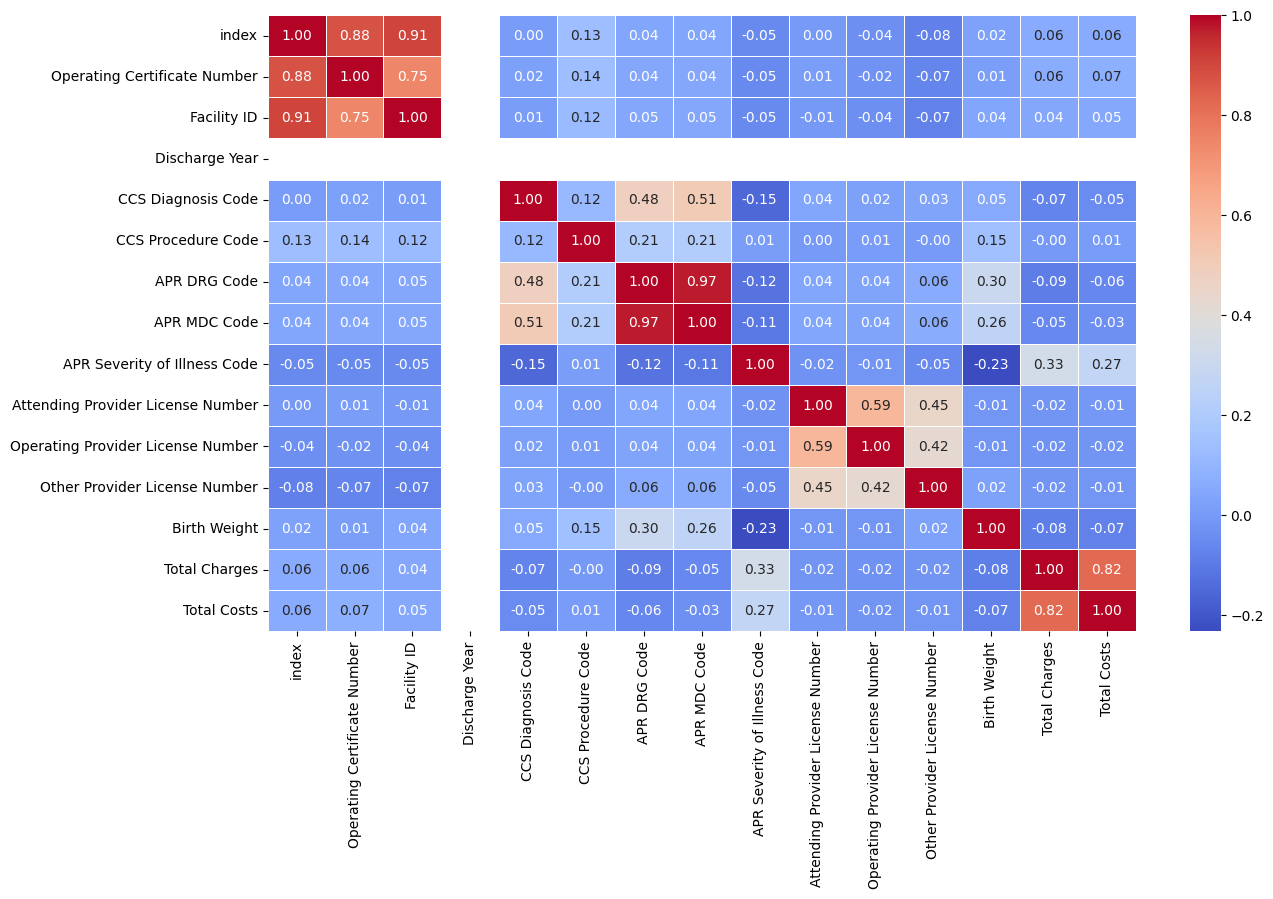

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)

In [ ]:
df['Facility ID'].unique().shape

(225,)

### 3. Model Training

In [ ]:
training_set = df.copy()
training_set.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
5,5,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,M,White,...,Self-Pay,NaN,218155.0,NaN,NaN,0,N,N,8420.75,3246.34
6,6,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,M,White,...,Self-Pay,NaN,207219.0,207219.0,NaN,0,N,Y,21090.63,6194.34
7,7,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,F,White,...,Self-Pay,NaN,244921.0,NaN,NaN,0,N,Y,3571.75,1435.34
8,8,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,F,White,...,Self-Pay,NaN,242288.0,NaN,NaN,0,N,Y,7850.84,2278.30
9,9,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,100.0,M,White,...,Self-Pay,NaN,191936.0,191936.0,NaN,0,N,N,13787.00,7491.89


**Label Encoding for the features that have Nominal Attributes**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = ['Health Service Area', 'Hospital County', 'Age Group', 'Gender', 'Race', 'Ethnicity', 'Type of Admission', 'Patient Disposition',
                     'APR Medical Surgical Description', 'Abortion Edit Indicator', 'Emergency Department Indicator', 'APR Risk of Mortality']

# Create a LabelEncoder object
le = LabelEncoder()

# Apply the LabelEncoder to each column
training_set[columns_to_encode] = training_set[columns_to_encode].apply(le.fit_transform)

In [ ]:
columns_for_train = ['Health Service Area', 'Hospital County', 'Facility ID', 'Age Group', 'Gender', 'Race', 'Ethnicity', 'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Code',
                     'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code', 'APR Medical Surgical Description', 'APR Severity of Illness Code',
                     'Birth Weight', 'Abortion Edit Indicator', 'Emergency Department Indicator', 'APR Risk of Mortality']

training_set = training_set[columns_for_train]
training_set.head()

,Health Service Area,Hospital County,Facility ID,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Medical Surgical Description,APR Severity of Illness Code,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,APR Risk of Mortality
5,0,0,1.0,0,1,3,0,1,7,234.0,0.0,930,25,0,2,0,0,0,2
6,0,0,1.0,0,1,3,0,1,8,234.0,108.0,930,25,0,2,0,0,1,2
7,0,0,1.0,0,0,3,0,1,7,242.0,0.0,812,21,0,2,0,0,1,2
8,0,0,1.0,0,0,3,0,1,7,229.0,0.0,342,8,0,1,0,0,1,2
9,0,0,1.0,2,1,3,0,0,7,143.0,86.0,227,6,1,1,0,0,0,2


In [ ]:
# Target variable
target = 'APR Risk of Mortality'

# Feature variables
features = ['Health Service Area', 'Hospital County', 'Facility ID', 'Age Group', 'Gender', 'Race', 'Ethnicity', 'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Code',
            'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code', 'APR Medical Surgical Description', 'APR Severity of Illness Code',
            'Birth Weight', 'Abortion Edit Indicator', 'Emergency Department Indicator']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
training_set = training_set.reset_index(drop=True)
training_set

,Health Service Area,Hospital County,Facility ID,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Medical Surgical Description,APR Severity of Illness Code,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,APR Risk of Mortality
0,0,0,1.0,0,1,3,0,1,7,234.0,0.0,930,25,0,2,0,0,0,2
1,0,0,1.0,0,1,3,0,1,8,234.0,108.0,930,25,0,2,0,0,1,2
2,0,0,1.0,0,0,3,0,1,7,242.0,0.0,812,21,0,2,0,0,1,2
3,0,0,1.0,0,0,3,0,1,7,229.0,0.0,342,8,0,1,0,0,1,2
4,0,0,1.0,2,1,3,0,0,7,143.0,86.0,227,6,1,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611428,1,31,9059.0,2,0,3,0,0,7,661.0,218.0,772,20,0,2,0,0,0,2
2611429,1,31,9059.0,1,0,3,0,0,7,660.0,218.0,772,20,0,2,0,0,0,2
2611430,1,31,9059.0,2,1,3,0,0,7,660.0,219.0,772,20,0,2,0,0,0,2
2611431,1,31,9059.0,2,0,3,0,0,7,660.0,219.0,772,20,0,2,0,0,0,2


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(training_set[features], training_set[target], test_size=0.2, random_state=42)

#### Logistic Regression

In [ ]:
logistic_model = LogisticRegression(penalty = 'elasticnet', solver='saga', l1_ratio=0.75)
logistic_model.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.75, penalty='elasticnet', solver='saga')

In [ ]:
# Make predictions on the testing data
y_pred = logistic_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.6754657879671522
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.11      0.18     24247
           1       0.34      0.10      0.15     59720
           2       0.77      0.92      0.84    327431
           3       0.39      0.38      0.38    110889

    accuracy                           0.68    522287
   macro avg       0.55      0.38      0.39    522287
weighted avg       0.64      0.68      0.63    522287



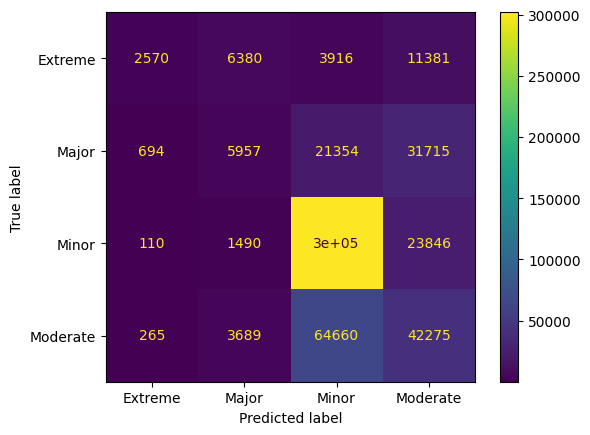

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=le.inverse_transform(logistic_model.classes_))
disp.plot()

In [ ]:
lm = LogisticRegression(penalty='none', max_iter=500)
lm.fit(X_train, y_train)

LogisticRegression(max_iter=500, penalty='none')

In [ ]:
# Make predictions on the testing data
y_pred = lm.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.7029545058559757
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.22      0.31     24247
           1       0.33      0.26      0.29     59720
           2       0.84      0.91      0.87    327431
           3       0.44      0.44      0.44    110889

    accuracy                           0.70    522287
   macro avg       0.54      0.46      0.48    522287
weighted avg       0.68      0.70      0.69    522287



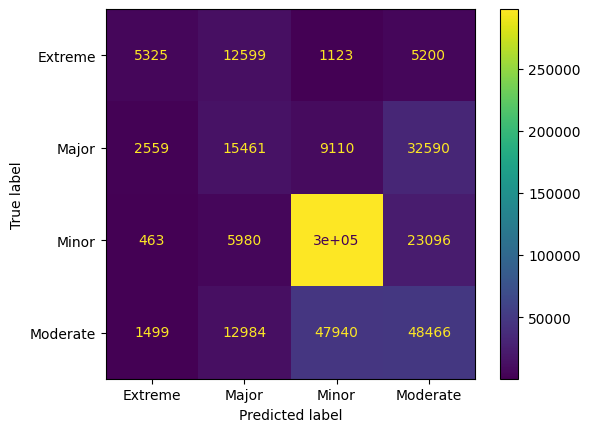

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=le.inverse_transform(logistic_model.classes_))
disp.plot()

Due to these low measures of accuracy in simple Logistic Regression, I decided to switch to higher complexity models so as to obtain a good model.

#### SVM Classifier.

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
lin_svc = LinearSVC()
lin_svc.fit(X_train, y_train)

LinearSVC()

In [ ]:
# Make predictions on the testing data
y_pred = lin_svc.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.7097649376683701
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.04      0.08     24247
           1       0.41      0.78      0.54     59720
           2       0.80      0.96      0.88    327431
           3       0.57      0.07      0.12    110889

    accuracy                           0.71    522287
   macro avg       0.63      0.46      0.40    522287
weighted avg       0.70      0.71      0.64    522287



Since, SVM gave similal results, I decided to switch to Decision Tree Classification.

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

I tried to use Grid Search so that I can try to get some vision on parameters that can be used. Grid Search was feasible here because Decison Trees take much lesser time as compared to the SVM or Logistic model.

In [ ]:
param_grid = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [25, 30, 35, 40],
    'min_samples_leaf': [2, 10, 15, 20]
}

In [ ]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [25, 30, 35, 40],
                         'min_samples_leaf': [2, 10, 15, 20]},
             scoring='accuracy')

In [ ]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters: ", best_params)
print("Best cross-validation score: ", best_score)

Best parameters:  {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 20}
Best cross-validation score:  0.8016050579353091


In [ ]:
# Make predictions on the testing data
y_pred = grid_search.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.8030546423709569
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73     24247
           1       0.57      0.56      0.56     59720
           2       0.91      0.93      0.92    327431
           3       0.61      0.59      0.60    110889

    accuracy                           0.80    522287
   macro avg       0.71      0.69      0.70    522287
weighted avg       0.80      0.80      0.80    522287



Then, with a few parameter changes I got the highest accuracy of 80% in Decision Tree so I moved on to ensemble method, Random Forest Classifier.

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=20, min_samples_leaf=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=100,
                       random_state=42)

In [ ]:
# Make predictions on the testing data
y_pred = dt.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.8083927036284648
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74     24247
           1       0.59      0.55      0.57     59720
           2       0.91      0.93      0.92    327431
           3       0.61      0.61      0.61    110889

    accuracy                           0.81    522287
   macro avg       0.72      0.70      0.71    522287
weighted avg       0.81      0.81      0.81    522287



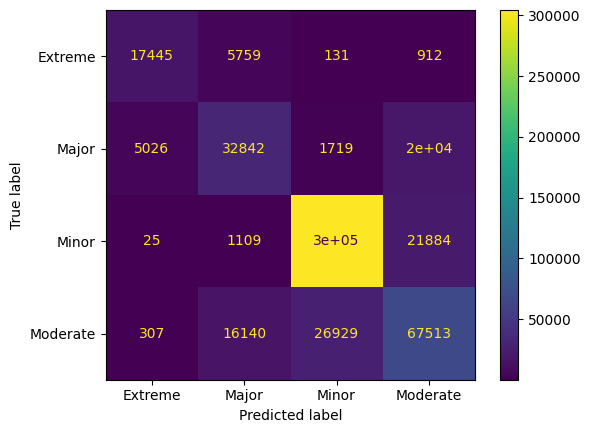

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=le.inverse_transform(dt.classes_))
disp.plot()

#### Random Forest Classifier

Here as well, manually searching on parameter ranges, I got the accuracy of about 81% in my model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=25, random_state=42, min_samples_leaf=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_leaf=100, n_estimators=150,
                       random_state=42)

In [ ]:
# Make predictions on the testing data
y_pred = rfc.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.8075962066832987
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74     24247
           1       0.59      0.56      0.58     59720
           2       0.91      0.93      0.92    327431
           3       0.61      0.59      0.60    110889

    accuracy                           0.81    522287
   macro avg       0.72      0.70      0.71    522287
weighted avg       0.80      0.81      0.80    522287



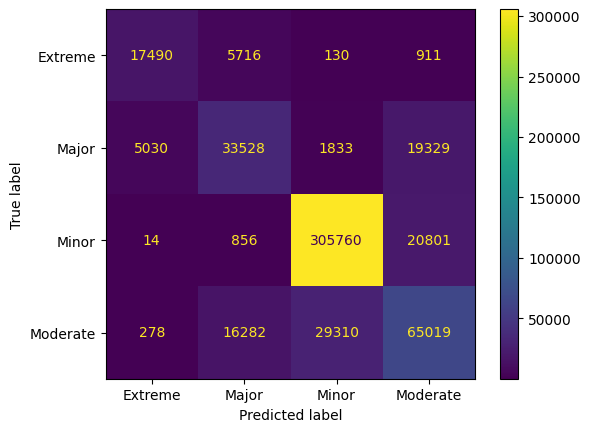

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=le.inverse_transform(rfc.classes_))
disp.plot()